# Regresión Lineal Simple

In [2]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os

pd.set_option('display.max_columns',None)

In [ ]:
# Para conectarse con google drive
from google.colab import drive
drive.mount('/gdrive')

# Configurar directorio de trabajo
os.chdir('/gdrive/MyDrive/Colab Notebooks/Estadistica')

# Verificar lista de archivos en directorio de trabajo
!ls

# Caso 1. Gasto en Publicidad

In [23]:
# Cargar datos
df1 = pd.read_excel('datos_regresion.xlsx', sheet_name='gasto publicidad 1')
df1.head()

,region,gasto-publicidad,ventas
0,1,77,80
1,2,50,55
2,3,71,60
3,4,72,74
4,5,81,78


## Análisis Exploratorio

In [24]:
# Estadísticas descriptivas
df1[['gasto-publicidad','ventas']].describe()

,gasto-publicidad,ventas
count,9.000000,9.000000
mean,78.555556,80.666667
std,15.883255,17.233688
min,50.000000,55.000000
25%,71.000000,74.000000
50%,77.000000,79.000000
75%,94.000000,92.000000
max,99.000000,107.000000


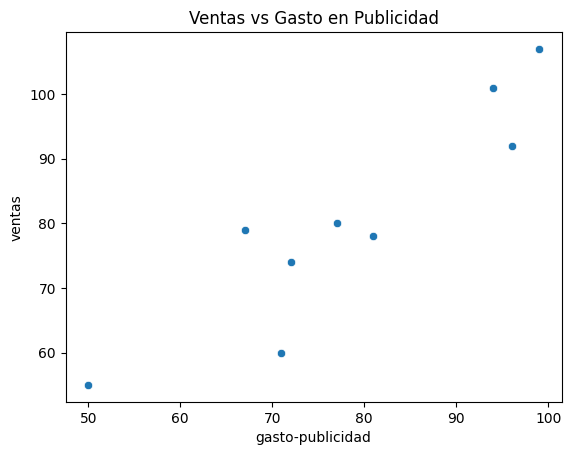

In [25]:
# Gráfico de dispersión ventas vs gasto en publicidad
sns.scatterplot(data=df1, x='gasto-publicidad', y='ventas')
plt.title('Ventas vs Gasto en Publicidad')
plt.show()

In [26]:
# Análisis de correlación
df1[['gasto-publicidad','ventas']].corr()

,gasto-publicidad,ventas
gasto-publicidad,1.000000,0.911796
ventas,0.911796,1.000000


## Modelo de Regresión

In [27]:
# Modelo de Regresión Lineal
# Define la variable dependiente
y = df1['ventas']

# Define la variable independiente
x = df1['gasto-publicidad']

In [28]:
# Agrega la constante
x = sm.add_constant(x)
x

,const,gasto-publicidad
0,1.0,77
1,1.0,50
2,1.0,71
3,1.0,72
4,1.0,81
5,1.0,94
6,1.0,96
7,1.0,99
8,1.0,67


In [29]:
# Ajusta el modelo de regresión
model = sm.OLS(y, x).fit()

# Imprime un resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     34.51
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           0.000615
Time:                        08:13:56   Log-Likelihood:                -29.852
No. Observations:                   9   AIC:                             63.70
Df Residuals:                       7   BIC:                             64.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.9501     13.467  

/Users/hfelizzola/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Análisis de las predicciones

In [30]:
# Guardar las predicciones
prediccion = pd.DataFrame()
prediccion['ventas'] = y
prediccion['ventas estimadas'] = model.predict()
prediccion['error'] = prediccion['ventas'] - prediccion['ventas estimadas']
prediccion

,ventas,ventas estimadas,error
0,80,79.127725,0.872275
1,55,52.416098,2.583902
2,60,73.191808,-13.191808
3,74,74.181128,-0.181128
4,78,83.085003,-5.085003
5,101,95.946157,5.053843
6,92,97.924796,-5.924796
7,107,100.892755,6.107245
8,79,69.234530,9.765470


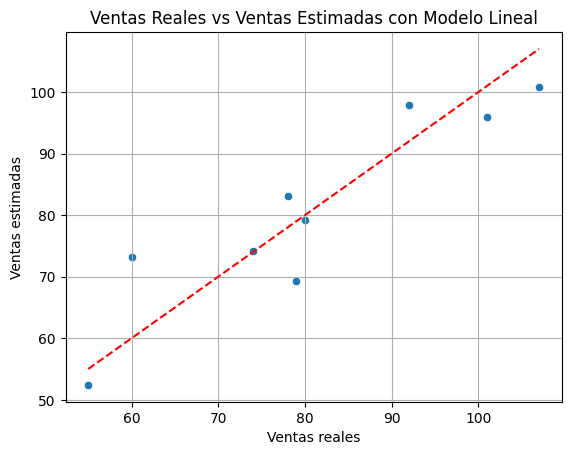

In [31]:
# Crea la gráfica de dispersión
sns.scatterplot(data=prediccion, x='ventas', y='ventas estimadas')

# Crear la linea de predicción perfectas
plt.plot([prediccion["ventas"].min(), prediccion["ventas"].max()], 
         [prediccion["ventas"].min(), prediccion["ventas"].max()], 
         color="red", linestyle="dashed")
plt.title('Ventas Reales vs Ventas Estimadas con Modelo Lineal')
plt.xlabel('Ventas reales')
plt.ylabel('Ventas estimadas')
plt.grid(True)
plt.show()

In [32]:
# MSE
mse = np.mean(prediccion['error']**2)
mse

44.51762949913135

In [33]:
# RMSE
rmse = np.sqrt(mse)
rmse

6.672153288042126

In [34]:
# MAPE
mape = np.mean(np.abs(prediccion['error']/prediccion['ventas']))
mape

0.0711683968171505

### Análisis de las métricas de las predicciones

- **RMSE (Root Mean Squared Error):** El RMSE mide la discrepancia promedio entre las predicciones del modelo y las ventas reales. Un valor bajo (6.69 en este caso) indica un buen ajuste del modelo a los datos.

- **MAPE (Mean Absolute Percentage Error):** El MAPE expresa el error relativo en términos porcentuales. Un MAPE del 7.3% significa que, en promedio, las predicciones del modelo tienen un error del 7.3% en relación con las ventas reales.

- **Conclusiones:** El análisis de los indicadores sugiere que el modelo de regresión utilizado es efectivo para predecir las ventas en función del gasto en publicidad. Los valores bajos de RMSE y MAPE indican que las predicciones son precisas y se ajustan bien a los datos reales. Por lo tanto, este modelo puede ser una herramienta valiosa para la toma de decisiones en relación con el presupuesto publicitario, ya que permite predecir las ventas con una alta precisión.

# Caso 2. Estimación del Consumo de Energia

Una compañía local de energía seleccionó una residencia típica para desarrollar un modelo empírico para el consumo de energía (en kilowatts por día) como una función de la temperatura promedio diaria durante los meses de invierno. Se obtuvo la siguiente información durante un periodo de 15 días.

1. Presente el gráfico de dispersión y analice la relación entre el consumo y la temperatura ¿Que tipo de relación se observa?
2. Presente la ecuación de regresión lineal que permita modelar el consumo de energía en función de la temperatura promedio del día. 
3. Presente un interpretación de cada uno de los coeficientes.
4. Utilizando el modelo de regresión haga predicciones del consumo de energía para los 15 días. 
5. Compare las predicciones con el consumo real de energía. Que tan precisa son las predicciones.
6. Proponga una métrica para evaluar las predicciones.

In [35]:
# Cargar datos
df2 = pd.read_excel('datos_regresion.xlsx', sheet_name='consumo energia')
df2.head()

,Día,Temperatura,Consumo de energía
0,1,0.0,70
1,2,8.0,57
2,3,7.5,60
3,4,13.5,63
4,5,14.0,57


## Análisis exploratorio

In [36]:
# Estadísticas descriptivas


In [37]:
# Gráfico de dispersión


In [38]:
# Análisis de correlación


## Modelo de Regresión

In [39]:
# Define la variable dependiente


# Define la variable independiente


In [40]:
# Agrega la constante


In [41]:
# Ajusta el modelo de regresión


# Imprime un resumen del modelo


### Análisis de la regresión

A continuación, presente un análisis de la regresión:

1. Modelo de regresión:
2. Significancia del modelo:
3. Interpretación de los coeficientes:
4. Significancia de los coeficientes:
5. Coeficiente de determinación $R^2$

## Análisis de las predicciones

In [42]:
# Guardar las predicciones


In [43]:
# Crea la gráfica de dispersión

# Crear la linea de predicción perfectas


In [44]:
# Calcular MSE


In [45]:
# Calcular RMSE
rmse = np.sqrt(mse)
rmse

6.672153288042126

In [46]:
# Calcular MAPE
mape = np.mean(np.abs(prediccion['error']/prediccion['ventas']))
mape

0.0711683968171505

### Análisis de las métricas de las predicciones

- **RMSE (Root Mean Squared Error):** .

- **MAPE (Mean Absolute Percentage Error):** .

- **Conclusiones:** .